### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [61]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-0.9*z))
    return res

In [62]:
z = np.linspace(-10, 10, 101)

In [63]:
probabilities = sigmoid(z)

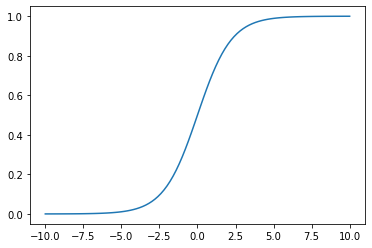

In [64]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [15]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105476
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779


## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [66]:
def calc_logloss2(y, y_pred):
    if y_pred ==1:
        y_pred -=0.0001
    if y_pred ==0:
        y_pred +=0.0001
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [87]:
W = eval_model(X_st, y, iterations=37500, alpha=1)

3750 [-22.4683723   -2.45169893  -5.81042064  18.68255089] 0.16403378731347834
7500 [-31.37445397  -3.25561122  -8.35614438  25.91452289] 0.13013168452625667
11250 [-37.53449431  -3.81149863 -10.09605934  30.89612999] 0.11415368900610626
15000 [-42.36691858  -4.24211994 -11.45898279  34.78465744] 0.10439548730486896
18750 [-46.42735478  -4.59732402 -12.60742195  38.03423721] 0.09754393029552634
22500 [-49.98694605  -4.90187097 -13.61919034  40.86664586] 0.09230333967292334
26250 [-53.19718794  -5.16977537 -14.53718092  43.40593945] 0.08805969271044407
30000 [-56.1507904   -5.40974587 -15.38732652  45.72822762] 0.08448249424478353
33750 [-58.90826021  -5.62760193 -16.18632795  47.88342625] 0.0813770795344811
37500 [-61.51098366  -5.82747313 -16.94542215  49.90595723] 0.07862088873300566


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [90]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)

In [91]:
calc_pred_proba(W,X_st)

array([3.20898685e-01, 8.75355468e-04, 1.00000000e+00, 1.57571308e-11,
       9.78055621e-01, 7.10053776e-03, 1.00000000e+00, 4.97098733e-03,
       6.94861144e-01, 1.00000000e+00])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [94]:
def calc_pred(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    for i in range(X.shape[1]):
        if y_pred[i]>0.5:
            y_pred[i]= 1
        else:
            y_pred[i]= 0 
    return y_pred

In [95]:
calc_pred(W,X_st)

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [97]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

Accuracy = 1

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{1}(x) = +1$$__  |   5    |   0   |
| __$$a_{1}(x) = -1$$__ |   0    |   5   |

precision(a, X) = 1

recall(a, X) = 1

F = 1

6. Могла ли модель переобучиться? Почему?

Думаю, что модель переобучилась, что она выучила все правильые ответы. Чтобы ее проверить неоходимо ввести матрицу X_test и проверить y_pred на тестовых данных